# Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('ggplot')

In [2]:
# Load dataset
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [5]:
print('There are ' + str(iris.data.shape[1]) + ' columns and ' + str(iris.data.shape[0]) + ' rows in the Iris dataset')

There are 4 columns and 150 rows in the Iris dataset


In [6]:
samples = iris.data
print(samples)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [7]:
species = iris.target
print(species)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)

78.851441426146


In [8]:
labels = model.fit_predict(samples)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Evaluating a clustering

### Cross tabulation with pandas
- clusters vs iris species is a "cross-tabulation"
- use the `pandas` library

In [9]:
print(iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


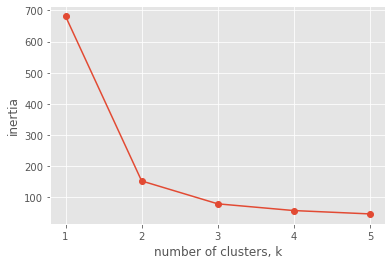

In [10]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Transforming features for better clustering
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)
```

## StandardScaler, then KMeans
- Need to perform two steps: `StandardScaler`, then `KMeans`
- Use `sklearn` pipeline to combine multiple steps
- Data flows from one step into the next

## Pipelines combine multiple steps
```python
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)
```

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit_predict(samples)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

## Visualizing hierarchies
### Visualizations communicate insight
- "t-SNE": Creates a 2D map of a dataset
- "Hierarchial" clustering

## A hierarchy of groups
```python
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linakge(samples, method='complete')
dendrogram(mergings,
           labels=country_names,
           leaf_rotation = 90,
           leaf_font_size=6)
plt.show()
```

## Intermediate clusterings and height of dendrogram
- Height on dendrogram specifies max distance between merging clusters
- Distance between clusters is defined by a "linkage meethod", e.g. "complete"
- In "complete" linkage: distance between clusters is max distance between their samples
- Specified via `method="complete"` parameter

## Extracting cluster labels
- use the `fcluster()` function to return a numpy array of cluster labels
```python
from scipy.cluster.hierarchy import linkage
mergings = linkage(samples, method="complete")
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 15, criterion='distance')
print(labels)
```

## t-SNE for 2D maps
- t-SNE = "t-distributed stochastic neighbor embedding"
- maps samples to 2D (or 3D) space
- map approximately preserves the nearness of the samples
- great for inspecting datasets

## t-SNE on the iris dataset
- iris dataset has 4 measurements, so samples are 4 dimensional
- t-SNE maps sample to 2D space
- t-SNE dosen't know that there are different species

## t-SNE in sklearn
- t-SNE only has `fit_transform()` method which simultaneously fits the model and transforms the data 
- t-SNE does not have a seperate `fit()` and `transform()` method; can't extend the map to include new data samples
- Must start over each time
- The learning rate must be chosen for the dataset, may vary
- the wrong LR may result in the points bunched together
- t-SNE features are different every time

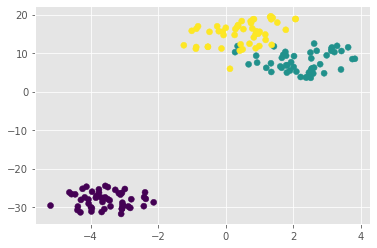

In [18]:
# t-SNE in sklearn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model = TSNE(learning_rate=150)
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species)
plt.show()

## Visualizing the PCA transformation
- Dimension reduction: more efficient storage and computation

## Pricipal Component Analysis
- PCA is a fundamental dimension reduction technique
- Step 1: "decorrelation"
- Step 2: reduces the dimensions
- rotates the data to align with the axes
- shifts the data samples so their mean is 0

## Dimension reduction 
- represents the same data, using less features
- important part of ML pipelines
- can be performed using PCA
- PCA features are in decreasing order of variance
- Assumes the low variance features are "noise" and high variance features are informative

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


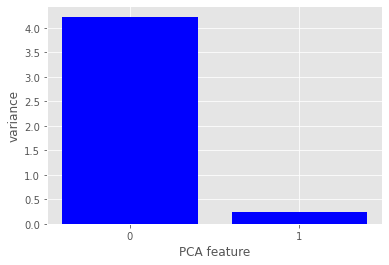

(150, 2)


In [31]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(samples)
transformed = model.transform(samples)
print(model.components_)
features = range(model.n_components_)
plt.bar(features, model.explained_variance_, color='b')
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()
print(transformed.shape)

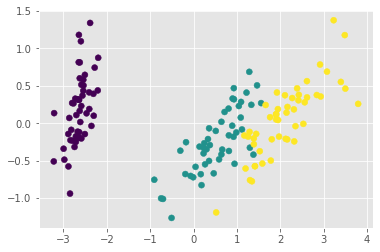

In [32]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=species)
plt.show()

## Intrinsic dimension
- Intrinsic dimension = the number of features needed to approximate the dataset
- Essential idea behind dimension reduction
- can be detected with PCA
- Intrinsic dimension = the number of PCA features with significant variance

In [47]:
# Word clustering

# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.lateral.io/resources-blog/the-unknown-perils-of-mining-wikipedia'
# Package the request, send the request and catch the response: r
r = requests.get(url)
# Extract the response as html: html_doc
html_doc = r.text
# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of webpage: example_title
example_title = soup.title

# Get text: example_text
example_text = soup.get_text()


print(example_text)

The Unknown Perils of Mining Wikipedia | Jun 02, 2015











Sign up to the new Lateral App!ProductFeaturesUse CasesProduct UpdatesBook a demoPricingResourcesBlogVideosGetting Started GuideAbout UsCompanyCareersSign upBook a demoLoginSign upMachine LearningThe Unknown Perils of Mining WikipediaDr. Benjamin WilsonIf a machine is to learn about humans from Wikipedia, it must experience the corpus as a human sees it and ignore the overwhelming mass of robot-generated pages that no human ever reads. We provide a cleaned corpus (also a Wikipedia recommendation API derived from it).Robots learning from robotsBecause of the breadth and availability of its content, Wikipedia has been widely used as a reference dataset for research in machine learning and for tech demos. However, Wikipedia has some serious problems that are not apparent from our familiarity with it as a resource for human beings.Wikipedia has good coverage of popular topics and very irregular coverage of unpopular topics. H

In [45]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

## Non-negative matrix factorization (NMF)
- Dimension reduction technique
- Unlike PCA, NMF models are interpretable
- all sample features must be non-negative
- follows the `.fit()` / `.transform()` method
- must specify the number of components `MNF(n_components=2)`
- works with NumPy arrays and `csr_matrix`
- measure the presence of words in each document using "tf-idf"
    - "tf" = frequency of word in document
    - "idf" reduces the influence of frequent words like "and" "the"    

In [51]:
from sklearn.decomposition import NMF
model = NMF(n_components=2)
model.fit(samples)

In [62]:
sample = np.array([0.0, 1.0, 0.5, 1.0, 0.0, 1.0])
print(sample)
bitmap = sample.reshape(2,3)
print(bitmap)

[0.  1.  0.5 1.  0.  1. ]
[[0.  1.  0.5]
 [1.  0.  1. ]]


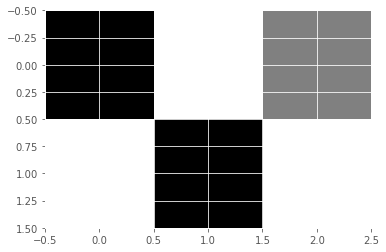

In [63]:
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.show()

# Building recommender systems using NMF
## Finding similar articles
- Task: recommend articles similar to article being read by customer
- Similar articles should have similar topics

- Apply NMF to the word frequency array

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())